 # The Goal:
 ## This exercise serves as a way to see how decision tree regression works as compared to continuous regression models.

 ## Imports.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

 ## Importing the dataset.

In [103]:
dataset = pd.read_csv('Position_Salaries.csv')

 ## Spliting data into independent variables (X) and dependent variables (y).

In [104]:
X = pd.DataFrame(dataset['Level'], columns=['Level'])
y = pd.DataFrame(dataset['Salary'], columns=['Salary'])

 ## Note:
 #### We do not split the data into training and testing data which will cause overfitting.
 This is an exercise in understanding decision tree regressors, so we are okay with the model overfitting.
 We will not be using this model to make future predictions, it's simply a learning tool.

 ## Fitting a decision tree regression model to the dataset.
 ### This is our non-continuous regression model.

In [105]:
decision_tree_regressor = DecisionTreeRegressor(random_state = 0)
decision_tree_regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

 ## Fitting a simple linear regression model to the dataset.
 ### This is our continuous regression model.

In [106]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 ## Here we are making large range of X values for our models to make predictions on.
 ### This will help illustrate the main difference between continuous and non-continuous regression models.

In [107]:
X_range = np.arange(min(X['Level']), max(X['Level']), 0.1, float).reshape(-1, 1) 

 ## Here we have each model make predictions for our X_range matrix.

In [108]:
decision_tree_predictions = decision_tree_regressor.predict(X_range)
linear_predictions = linear_regressor.predict(X_range)

 ## Let's look at some of our decision tree regressor's predictions.

In [109]:
pd.DataFrame(decision_tree_predictions, columns=['Salary']).head(20)

,Salary
0,45000.0
1,45000.0
2,45000.0
3,45000.0
4,45000.0
5,45000.0
6,50000.0
7,50000.0
8,50000.0
9,50000.0


 Notice that the predictions jump in large chunks,the first 6 are all 45,000, then it jumps to 50,000 then 60,000.
 Our predictions continue like this throughout. This has to do with the way decision tree regression works.
 It's splitting our independent variables into to groups called terminal leaves, our predictions are based on the average inside these leaves.

 ## Here's some of our simple linear regressor's predictions.

In [110]:
pd.DataFrame(linear_predictions, columns=['Salary']).head(20)

,Salary
0,-114454.545455
1,-106366.666667
2,-98278.787879
3,-90190.909091
4,-82103.030303
5,-74015.151515
6,-65927.272727
7,-57839.393939
8,-49751.515152
9,-41663.636364


 All these predictions are different from each other, this is because simple linear regression is a continuous model.
 So each X gets a unique y based on the algorithm.

 ## Here's a plot of the simple linear regressor's predictions.
 ### Take note of the shape of the line.

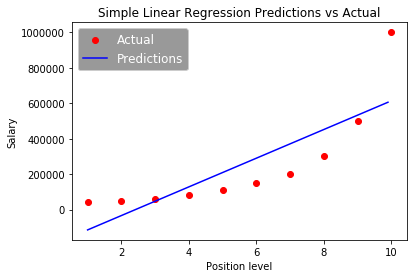

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)

actual = ax.scatter(X, y, color = 'red')
pred = ax.plot(X_range, linear_predictions, color = 'blue')

ax.set_title('Simple Linear Regression Predictions vs Actual',color='black')
ax.set_facecolor('white')

ax.set_xlabel('Position level',color='black')
ax.set_ylabel('Salary',color='black')

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

ax.legend((actual,pred[0]),('Actual','Predictions'),facecolor='grey',loc='upper left', fontsize=12)
plt.show()

 ## Here's a plot of the decision tree regressor's predictions.
 ### Notice the difference in shape between this line and the previous.

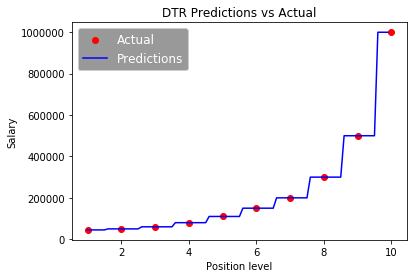

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
actual = ax.scatter(X, y, color = 'red')
pred = ax.plot(X_range, decision_tree_predictions, color = 'blue')

ax.set_title('DTR Predictions vs Actual',color='black')
ax.set_facecolor('white')

ax.set_xlabel('Position level',color='black')
ax.set_ylabel('Salary',color='black')

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

ax.legend((actual,pred[0]),('Actual','Predictions'),facecolor='grey',loc='upper left', fontsize=12)
plt.show()

 The vertical lines are where our decision tree as split our data into two leaves.
 The horizontal lines are the width of our leaves, so any Level value that lands on the horizontal line will gate that corresponding Salary value.
 For example the X value of 5.9 and the X value of 6.4 will get the same prediction.

 ### Note
 The Position_Salaries.csv was taken from the Machine Learning A-Z™: Hands-On Python & R In Data Science course offered on Udemy.
 This served as an exercise for me to learn how decision tree regression works as well as what it is.